In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

### Beschreibende Statistik
### Wahrscheinlichkeitstheorie
### <span style="color:blue">Schließende Statistik</span>
#### Punktschätzungen
- Punktschätzer
- Max-Likelihood-Prinzip
- Robuste Schätzung

#### <span style="color:blue">Tests</span>
- Nullhypothese
- Vergleich mit Stichprobe
- Entscheidung: verwerfen?
- Binomialtest
- Gaußtest
- t-Test

#### Intervallschätzungen

# Fragen der Schließenden Statistik
- Welche Verteilung hat die Grundgesamtheit?
    - $\Rightarrow$ Theorie, Ockhams Rasiermesser, Vergleich
- Welcher Parameterwert paßt am besten zu den Beobachtungen?
    - $\Rightarrow$ Schätzungen
- <span style="color:blue">Sind die Beobachtungen mit einem angenommenen Parameter vereinbar?</span>
    - <span style="color:blue">$\Rightarrow$ Testen einer Nullhypothese</span>
- Welche Parameterwerte sind mit den Beobachtungen vereinbar?
    - $\Rightarrow$ Vertrauensintervall
- Wie kamen die Beobachtungen zustande?
    - $\Rightarrow$ Versuchsplanung  

# Nullhypothen-Signifikanz-Test (*NHST*)
Inhalt:
- Schätzer $\leftrightarrow$ Test
- Zielsetzung
- Beispiel
- Vorgehen
- Probleme und Lösungen
- Zusammenfassung
- Ausblick

### Schätzer
- Stichprobe
- Kennzahl ($\overline{x},\;\sigma,\;\dots$)
- Parameter ($\mu,\;\sigma,\;\lambda,\;\dots$)

### Test
- Hypothese
- Stichprobe
- Schätzer für Kennzahl/Parameter 
- vergleichen mit Hypothese
- **a) In Einklang mit Hypothese?**
- **b) Signifikanter Unterschied?**

# Ziel eines Tests

#### Hypothese: vorgegebene, vermutete oder interessierende Verteilung
#### Schätzer aus Stichprobe
#### Vergleich

## $\Rightarrow$ standardisierte, akzeptierte Entscheidungsregel

## 1) Stichprobe $\not\in$ Hypothese?

#### Beispiele
- Würfel unfair: $p_6\neq\frac{1}{6}$?
- Zustimmung bei Umfrage: Mehrheit?
- Wareneingangskontrolle: Ausschuß?
- Wirksamkeit eines Medikaments
- Messwert und Genauigkeit/Meßfehler in Physik

## 2) Effekt - zwei gepaarte Stichproben

### Stichproben $\{X_i|A\} \neq \{X_i|B\}$ ? 

#### Beispiele
- vor und nach Training 
- Wirkung Medikament / Plazebo an denselben Patienten
- Absatzänderung nach Werbung


## 3) Zwei unabhängige Stichproben

### Stichproben $\{X_i|A\} \neq \{X_j|B\}$ ? 

#### Beispiele
- Wirkung Medikament / Plazebo in Gruppe und Kontrollgruppe
- Wahrnehmungswahrscheinlichkeit bei verschiedenen Helligkeiten
- Umfrage unter Frauen / Männern

# Beispiel Geburten
### Frage: Sind Mädchen- und Jungengeburten gleich wahrscheinlich?
### Ansatz: Eine Stichprobe, dichotomes Merkmal

**Voraussetzung: ** Zufallsvariable $X$ und i.i.d. Stichproben $X_i$ <br>
**Nullhypothese: ** $\pi_0=\frac{1}{2}$<br>
**Stichprobe: ** Ein Tag in der Klinik: $N\!=\!10$ Geburten<br>
**Modell: ** Binomialverteilung mit Parameter $\pi_0$, unter der Nullhypothese
$$\mathcal{B}(N\!=\!10,\;\pi_0\!=\!0.5)$$

**Prüfgröße: ** Anteil der Mädchen $x_i\!=\!1$
$$\pi = \overline{X}=\frac{1}{N}\sum_{i=1}^N X_i$$

**Schätzer:** 
$$\hat\pi = \overline{X} \quad\text{für}\quad \mathcal{E}(X) = \pi$$

### Fragestellung
#### Welche Beobachtungen sind mit der Nullhypothese im Einklang?
#### Welche Beobachtungen widersprechen der Nullhypothese - und führen daher zu deren Ablehnung?

- 5:5 $\checkmark$
- 4:6 $\checkmark$ ?
- 3:7 ?

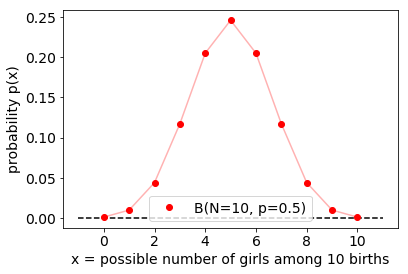

In [3]:
'''number of girls births according to binomial (equal) distribution'''
N = 10                                         # number of total births 
pi = 0.5                                       # probability of female under 0-hypothesis
ngirls = np.arange(N+1)                        # all possible numbers of females 0..N
distr = stats.binom(n=N, p=pi)                 # freeze distribution to parameter N, pi 
# calculate binomial distribution for all posible m out of N with probability pi
P = np.asarray([distr.pmf(m) for m in ngirls]) # probabilities of all possible results 
descr = 'B(N={:d}, p={:.1f})'.format(N, pi)    # descriptional text for graph including numbers
plt.plot(ngirls, P, 'ro', label=descr)         # 11 possible results: pobability vs. number of girls m
plt.plot(ngirls, P, 'r-', alpha =.3)           # same with connecting lines
plt.legend(loc='lower center')
plt.hlines(0.0, -1, 11, colors='k', linestyles='--')
plt.xlabel('x = possible number of girls among 10 births')
plt.ylabel('probability p(x)');

- Aufgetragen in X: Zahl von 0 bis 10 (nicht wie oben in der Formel für $\pi$ die Wahrscheinlichkeit
    - Umrechnung: mal N
- Keine Zahl ist gänzlich unmöglich.
- Aber eben unwahrscheinlich, wie hier 0 und 1.
- Verwerfungsbereich
    - 0 sicherlich, viel zu unwahrscheinlich, glauben wir nicht
    - 1 sehr unhwahrscheinlich, auch nicht.
    - 2 hat schon fast 5% Wahrscheinlichkeit
    - 3 mit 12% noch mehr. 
    - Klingt auch nicht wirklich wahrscheinlich.
    - **ABER** nirgends gibt es 50% oder höher.
    - **ALSO** Bereich von bis, der Wahrscheinlich ist.
    - Bereich zB von 3 bis 7.
- Für den Verwerfungsbereich 
    - müssen wir alle Wahrscheinlichkeiten aufaddieren, 
    - daß drunter unwahrscheinlich, also 0.001 + 0.01 ..... 
    - Lassen wir Python rechnen:

In [4]:
'''check sum of probabilities up to...'''
psum = 0.
for i, p in enumerate(P):
    psum += p
    print('number of girls <= {:2d} with probability p={:.3f}'.format(i, psum))

number of girls <=  0 with probability p=0.001
number of girls <=  1 with probability p=0.011
number of girls <=  2 with probability p=0.055
number of girls <=  3 with probability p=0.172
number of girls <=  4 with probability p=0.377
number of girls <=  5 with probability p=0.623
number of girls <=  6 with probability p=0.828
number of girls <=  7 with probability p=0.945
number of girls <=  8 with probability p=0.989
number of girls <=  9 with probability p=0.999
number of girls <= 10 with probability p=1.000


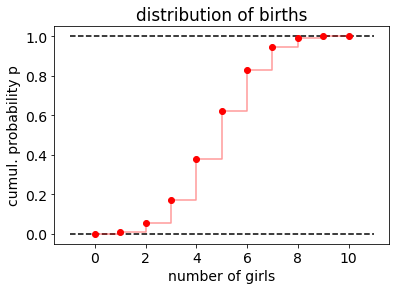

In [5]:
cdf = distr.cdf(ngirls)           # cumulative distribution function
plt.plot(ngirls, cdf, 'ro');      # plot as dots and connect opaque
plt.step(ngirls, cdf, 'r-', where='post', alpha=0.4)
plt.hlines([0.0, 1.0], -1, 11, colors='k', linestyles='--')
plt.title('distribution of births')
plt.xlabel('number of girls')
plt.ylabel('cumul. probability p');

### Vorläufige Aussage
Unter der Voraussetzung = **Nullhypothese** $H_0$: *Gleichverteilung* zwischen Jungen und Mädchen
- ist es sehr unwahrscheinlich (1 Promille) 10 Mädchen zu erhalten

aber bereits 
- über 10% Wahrscheinlichkeit für mindestens 3 Mädchen

### Schwelle?
Ab welchem Wert ist es *ziemlich unwahrscheinlich*, daß ein konkretes Ergebnis einer Stichprobe noch mit der Nullhypothese in Einklang steht, ab welchem Wert wollen wir also die Nullhypothese **verwerfen**?

### Festlegung
Wir wählen willkürlich als *ziemlich unwahrscheinlich* $\;\alpha = 0.1$ oder $10\%$.

### Aufgabe
Konstruiere 
- aus der festgelegten Schwelle *ziemlich unwahrscheinlich* $\alpha= 10\%$ 
- einen Bereich an Werten, 
    - in dem die kumulierte Wahrscheinlichkeit kleiner als das vorgegebene $\alpha$ ist

den ***Verwerfungsbereich***, ***Ablehnungsbereich***

### Ergebnis für Ablehnungsbereich
{0, 1, 2}

### Folgerung
#### Eine realisierte Stichprobe:
- 3 Mädchen 
- Verhältnis 3:7
- $\checkmark$
- $\Rightarrow$ Die Nullhypothese wird nicht verworfen

### Irrtumswahrscheinlichkeit

#### Eine andere realisierte Stichprobe:
- 2 Mädchen
- Verhältnis 2:8
- $\Rightarrow$  Wir verwerfen daher die Nullhypothese.

Dabei gehen wir eine **Irrtumswahrscheinlichkeit** von $\alpha$ ein. 

### Problematik

- Festlegung der *Irrtumswahrscheinlichkeit* $\alpha$ unabdingbar
- Verwerfungsbereich

#### Aussage $\Leftrightarrow$ Irrtum

## Zweiseitiger Ablehnungsbereich

Symmetrie unter Nullhypothese *gleich verteilt*
$$p(n_M \leq 2) = p(n_J \leq 2) = p(n_M \geq 8)$$

#### Nullhypothese:
$$H_0:\; \pi=0.5$$

#### Alternativhypothese:
$$H_A:\;\pi\neq0.5$$

####  Irrtumswahrscheinlichkeit
- Zweiseitiger Ablehnungsbereich 
- (würde die Irrtumswahrscheinlichkeit verdoppeln)

#### ... Ablehnungsbereich anpassen
- gleiche Irrtumswahrscheinlichkeit
- (jede der beiden Seiten des einseitigen Ablehnungsbereichs verkleinert sich dadurch)

### Beidseitige kumulierte Wahrscheinlichkeit:
<br>
$$p(n_M \leq 0 ) +  p(n_M \geq 10) = 0,002 \qquad \Rightarrow H_0 \;\text{ verwerfen}\qquad$$
$$p(n_M \leq 1 ) +  p(n_M \geq \;9) = 0,021 \qquad \Rightarrow H_0 \;\text{ verwerfen}\qquad$$
$$p(n_M \leq 2 ) +  p(n_M \geq \,8) = 0,110 \qquad \Rightarrow H_0 \;\text{nicht verwerfen}$$
zur Irrtumswahrscheinlichkeit $\alpha = 10\%$

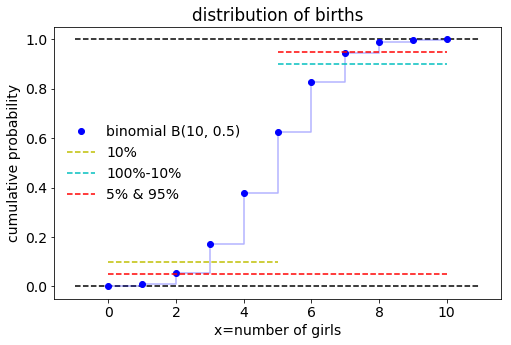

In [6]:
# ms and cdf from above
f = plt.figure(figsize=(8, 5))
plt.plot(ngirls, cdf, 'bo', label='binomial B(10, 0.5)')
plt.step(ngirls, cdf, 'b-', where='post', alpha=.3)
plt.hlines([0.0, 1.0], -1, 11, colors='k', linestyles='--')
plt.title('distribution of births')
plt.ylabel('cumulative probability')
plt.xlabel('x=number of girls')
plt.plot( [0.,  5.], 2*[0.1],  'y--', label='10%')        # yellow line for 10%
plt.plot( [5., 10.], 2*[0.9],  'c--', label='100%-10%')   # green line for 90%
plt.plot( [0., 10.], 2*[0.05], 'r--', label='5% & 95%')   # black line for  5% \
plt.plot( [5., 10.], 2*[0.95], 'r--')                     # black line for 95% / sums to 10% outside
plt.legend(loc='center left', frameon=False);

## Test für die Binomialverteilung

    scipy.stats.binom_test?

#### Parameter

    alternative : {'two-sided', 'greater', 'less'}, optional
        Indicates the alternative hypothesis. The default value is 'two-sided'.


#### Rückgabe:
kumulierte Wahrscheinlichkeit **p-Wert**, der von der Stichprobe erreicht wurde.

## p-Wert eines Tests

erlaubt bequeme Bestimmung des p-Wertes ohne "Umweg" über Ablehnungsbereich.

Entscheidung kann sofort (je nach vorher festgelegter Irrtumswahrscheinlichkeit $\alpha$) gefällt werden.

### Vergleich:
$$p\text{-Wert} \geq \alpha \Rightarrow  \quad \text{vereinbar mit Nullhypothese}$$
$$p\text{-Wert} < \alpha \Rightarrow  \quad \text{Nullhypothese verwerfen}\quad\;$$

In [7]:
'''does the number m of girls deviate from 0-hypothesis 50%?'''
N = 10                                  # number of births in one day
pi = 0.5                                # 0-hypothesis 50%
for m in range(N+1):                    # try all possible numbers of girls
    p = stats.binom_test(m, N, 0.5)     # p-value if binomial(N, .5) distrib.
    print('m={:2d}  p={:6.3f}'.format(m, p))

m= 0  p= 0.002
m= 1  p= 0.021
m= 2  p= 0.109
m= 3  p= 0.344
m= 4  p= 0.754
m= 5  p= 1.000
m= 6  p= 0.754
m= 7  p= 0.344
m= 8  p= 0.109
m= 9  p= 0.021
m=10  p= 0.002


## p-Wert - Interpretation
#### Voraussetzung
Geburten für Jungen und Mädchen sind i.i.d. Zufallsvariablen mit Binomial-Verteilung.
#### Nullhypothese
Jungen und Mädchengeburten sind gleich häufig $\;H_o:\;\pi = 0.5$
####  Alternativhypothese
Jungen und Mädchen unterschiedlich häufig: $\;H_1:\;\pi \neq 0.5$
#### Test
Zweiseitiger Test auf $\alpha$-Niveau

#### p-Wert
Der $p$-Wert eines Tests ist die Wahrscheinlichkeit unter der Nullhypothese, den beobachteten Prüfgrößenwert oder einen in Richtung der Alternative extremeren Wert zu erhalten. 

- Der $p$-Wert eines Tests erlaubt bequemen Vergleich mit Signifikanzniveau/Irrtumswahrscheinlichkeit ohne 'Umweg' über den Ablehnungsbereich
	- Entscheidung kann sofort (je nach vorher festgelegter Irrtumswahrscheinlichkeit $\alpha$) gefällt werden
    - $p < \alpha \quad \Rightarrow$ Nullhypothese verwerfen
- Der $p$-Wert zeigt dasjenige Niveau an, **ab** dem die Nullhypothese mit $\alpha'=p$ verworfen worden wäre;
    - ansonsten ist dieser Wert <span style="color:red">sinnfrei</span>; auf diesen Wert wäre man vorher, ohne das Ergebnis des Experiments zu kennen, nie gekommen
- Der $p$-Wert kann jedoch für jedes Niveau verglichen werden: 
    - ein kritischer Kollege ist beim Test mit $\alpha=10\%$ vielleicht nicht überzeugt 
    - zeigt man ihm direkt $p<0.001$, dann überzeugt ihn das mit *seinem* kritischeren Niveau
    - Nachrechnen des Verwerfungsbereichs auf einem anderen Niveau benötigt die Originaldaten

# Vorgehensweise Test
# Zusammenfassung und Verallgemeinerung

- **1) Formulieren des Problems**
- **2) Modellannahme**
    - Welcher Art sind die Daten
    - Welche Verteilung wird erwartet
- **3) Aufstellen der Nullhypothese und der Alternativhypothese**
    - Ziel soll es sein, die Nullhypothese ablehnen zu können
    - einseitiger Test
    - zweiseitiger Test
- **4) Festlegen des Signifikanzniveaus**
    - zulässige Irrtumswahrscheinlichkeit $\alpha$
- **5) Teststatistik / Prüfgröße aussuchen**
    - verdichtet Information aus der Stichprobe
    - Verteilung unter H$_A$ sollte sich deutlich von der unter H$_0$ unterscheiden

## ...
 
- **6) Verteilungsfunktion $F$ bestimmen**
    - theoretisch bestimmbar
    - asymptotisch bestimmbar
    - Simulation
- **7) Verwerfungsbereich**
    - Statistik: Verteilung der Prüfgröße
    - Hypothese: Richtung einseitig/zweiseitig
    - Signifikanzniveau: Irrtumswahrscheinlichkeit $\alpha$
- **$\;$a) Verwerfungsbereich bestimmen**
    - Wert für $t$ der Teststatistik $T$ aus Daten bestimmen
    - Tabelle oder berechnen $\qquad\qquad\qquad\qquad\qquad\qquad$ oder
- **$\;$b) $p$-Wert bestimmen**
    - Tabelle oder berechnen
- **8) Entscheidung fällen**
    - $t$ im Verwerfungsbereich: Verwerfen der Nullhypothese
    - $p$ außerhalb $\alpha$: Verwerfen der Nullhypothese
    - sonst: $H_0$ nicht verwerfbar

----

## Erweiterung des Beispiels: aktuelle Daten


Quelle: http://www.statistik.baden-wuerttemberg.de/BevoelkGebiet/GeburtSterben/01065011.tab?R=GS416041

#### Festlegen der Irrtumswahrscheinlichkeit 
$$\alpha=0.05$$

#### Bestimmung des Verwerfungsbereichs

Hilfreich ist von `scipy.stats` zu jeder Verteilung (zB. `binom`) die `ppf()`-Funktion *Perzentile*

    stats.binom.ppf?
    Percent point function (inverse of `cdf`) at q of the given RV.    

In [8]:
'''test for observed births in Tübingen 2017'''
N = 888                                    # number of births in Tübingen 2017
pi0 = 0.5                                  # null-hypothesis: probability of female
alpha = 0.05                               # set level of significance to 5%
bino2017 = stats.binom(N, pi0)             # freeze paramters for re-using...
x05 =  bino2017.ppf(alpha).astype(int)     # don't reject above  5% one-sided
x95 =  bino2017.ppf(1-alpha).astype(int)   # don't reject below 95% one-sided
x025 = bino2017.ppf(alpha/2).astype(int)   # don't reject above   2,5% \ two-sided
x975 = bino2017.ppf(1-alpha/2).astype(int) #          and below  97,5% /
med =  bino2017.ppf(0.5).astype(int)       # definition of median and it's (point-) probb.
print( 'median {:.2f} has (point) probability {:.5f}'.format(med, bino2017.pmf(med)))
print( 'one side lower rejection region < {}  has probability {:.5f}'
      .format(x05, bino2017.cdf(x05-1)))   # cumulative lower tail below x10
print( 'one side upper rejection region > {}  has probability {:.5f}'
      .format(x95, 1.-bino2017.cdf(x95)))  # cumulative upper tail above x90
print( 'two sided rejection regions (<{}, >{}) have probability {:.5f}'
      .format(x025, x975, bino2017.cdf(x025-1) + (1.-bino2017.cdf(x975))))
ngirls = 451                               # number of girls observed            
print( 'binom_test({3}, {0}, {1}) gives p={2:.5f} for {3} girls'
      .format(N, pi0, stats.binom_test(ngirls, N, pi0), ngirls))

median 444.00 has (point) probability 0.02677
one side lower rejection region < 419  has probability 0.04347
one side upper rejection region > 469  has probability 0.04347
two sided rejection regions (<415, >473) have probability 0.04765
binom_test(451, 888, 0.5) gives p=0.66268 for 451 girls


#### [ÜA] Index?
Erklären Sie warum der "Index" des *lower tail*s decrementiert werden muß, der des *upper tail*s hingegen nicht.

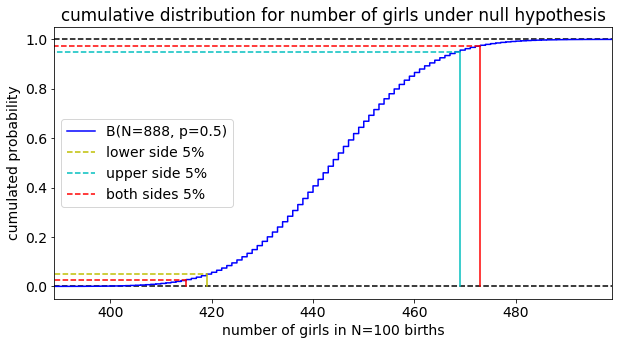

In [10]:
'''diagram of same distribution as before'''
ng = np.linspace(0, N, N+1)                          # all possible values for #girls
cg = bino2017.cdf(ng)                                # cdf each thereof
plt.figure(figsize=(10, 5))
plt.title('cumulative distribution for number of girls under null hypothesis')
descr = 'B(N={:d}, p={:.1f})'.format(N, pi0)         # description for graph incl. numbers
plt.step(ng, cg, 'b-', where='post', label=descr)    # show steps to clarify cdf and ppf
xlimit = (bino2017.ppf(0.0001), bino2017.ppf(0.9999))# show only relevant part
plt.xlim(xlimit)                                     # from above (1-promille)
plt.plot( [0, x05],    2*[0.05],  'y--', label='lower side 5%')   # xXX from above
plt.plot( [x95, 100],  2*[0.95],  'c--', label='upper side 5%')
plt.plot( [0, x025],   2*[0.025], 'r--', label='both sides 5%')
plt.plot( [x975, 100], 2*[0.975], 'r--')
plt.plot( 2*[x05],  [0., 0.05], 'y-')            # x to rejection regions
plt.plot( 2*[x95],  [0., 0.95], 'c-')            # aXX from above
plt.plot( 2*[x025], [0., 0.025], 'r-')
plt.plot( 2*[x975], [0., 0.975], 'r-')
plt.xlabel('number of girls in N=100 births')
plt.ylabel('cumulated probability')
plt.hlines([0.0, 1.0], xlimit[0], xlimit[1], colors='k', linestyles='--')
plt.legend(loc='center left');

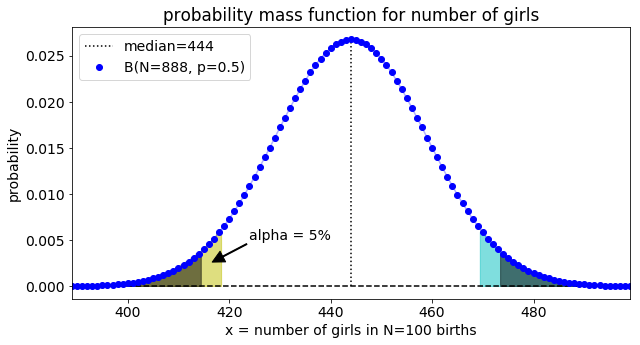

In [11]:
'''number of girls - cumulated probability in tails'''
# aXX, bino2017 from above
x = np.arange(0, N+1)                   # all possible values of number of births
pmf = bino2017.pmf(x)                   # probabilty mass function of null hypothesis
plt.figure(figsize=(10, 5))
plt.title('probability mass function for number of girls')
plt.xlim(xlimit)                        # same frame as before
plt.plot((med, med), (0, bino2017.pmf(med)), 'k:', label='median={}'.format(med)) 
plt.plot(x, pmf, 'bo', label=descr)     # pmf, label as before
plt.plot(x, pmf, 'b-', alpha=.3)        # same but connected
# fill area of rejection regions
xx = np.zeros(2*len(x))
xx[0::2] = x-.5               # frontal border of rectangle
xx[1::2] = x+.5               # postal border of rectangle
px = np.zeros_like(xx)        # pmf 
px[0::2] = pmf                # within rectangle
px[1::2] = pmf                # 
plt.hlines([0.0], xlimit[0], xlimit[1], colors='k', linestyles='--')
# upper bound is included => +1 for first rejected above 
# lower bound is included => since slicing is exlusive, it subtracts automatically
plt.fill_between(xx[:2*x05],    0, px[:2*x05],    color='y', alpha=0.5) # alpha<5% 
plt.fill_between(xx[2*x95+2:],  0, px[2*x95+2:],  color='c', alpha=0.5) # alpha>95%
plt.fill_between(xx[:2*x025],   0, px[:2*x025],   color='k', alpha=0.5) # alpha<2.5%
plt.fill_between(xx[2*x975+2:], 0, px[2*x975+2:], color='k', alpha=0.5) # and  >97.5%

plt.annotate('alpha = 5%', xy=(x[x05-2]-.5, .5*pmf[x05-2]), xytext=(x[x05]+5, 0.002+pmf[x025-2]),
             arrowprops=dict(facecolor='black', shrink=0.02, width=1) )
plt.xlabel('x = number of girls in N=100 births')
plt.ylabel('probability')
plt.legend(loc='upper left');

for 437 girls in 888 births (49.21%) p(less)=0.33134 under 0-hypothesis "equal"


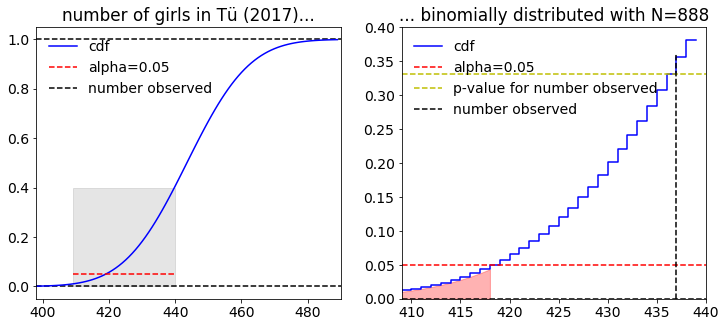

In [12]:
# N = 59510                               # number of births in Germany Dezember 2017
# g = 28886                               # girls among them
N = 888                                   # number of births in Tübingen 2017
g = N - 451                               # girls among them
pi0 = 0.5                                 # H0: equal distribution 
alpha = 0.05                              # significance level 5%
binom2017 = stats.binom(N, pi0)           # define the Binomial distribution N, pi0
f = plt.figure(figsize=(12,5))            # 

f.add_subplot(1, 2, 1)                    # -- left plot --
x1, x2 = binom2017.ppf([0.001, 0.999])    # sart and end of 
ms = np.arange(x1, x2, 1)                 # ROI number girls
cdf = binom2017.cdf(ms)                   # cumulative distribution function
plt.plot(ms, cdf,'b-', label='cdf')       # complete cdf graph 
plt.title('number of girls in Tü (2017)...')
plt.xlim(x1, x2)
plt.hlines([0.0, 1.0], x1, x2, colors='k', linestyles='--')
ylevel = .4  # 0.09
x3, x4 = binom2017.ppf([.01, ylevel])     # start and end of ROI, shaded here:
plt.fill_between([x3, x4], 0, [ylevel, ylevel], color='k', alpha=0.1)
plt.plot([x3, x4], 2*[alpha], 'r--', label='alpha=0.05')
plt.plot(2*[g], [0, p], 'k--', label='number observed')
plt.legend(loc='upper left', frameon=False)

f.add_subplot(1, 2, 2)                    # -- right plot --
ms = np.arange(x3, x4, 1)                 # ROI number girls
cdf = binom2017.cdf(ms)                   # cumulative distribution function
plt.plot(ms, cdf,'b-', label='cdf', drawstyle='steps-pre')       # ROI of cdf
plt.xlim(x3, x4)
plt.hlines([0.0], x3, x4, colors='k', linestyles='--')
plt.ylim(0.0, ylevel)
plt.title('... binomially distributed with N={}'.format(N))
p = stats.binom_test(g, N, 0.5) / 2.      # 1-sided p-value for observed g girls
print('for {} girls in {} births ({:.2f}%) p(less)={:.5f} under 0-hypothesis "equal"'
      .format(g, N, g*100./N, p))
plt.plot([x3, x4], 2*[alpha], 'r--', label='alpha=0.05')
plt.plot([x3, x4], 2*[p], 'y--', label='p-value for number observed')
plt.plot(2*[g], [0, .9*ylevel], 'k--', label='number observed')
rr = binom2017.ppf(0.05).astype(int)      # border of the the reject region (1-sided)
ri = np.rint(rr - x3).astype(int)         # index within ms on x-axis
plt.fill_between(ms[:ri], 0, cdf[:ri], color='r', alpha=0.3)
plt.legend(loc='upper left', frameon=False);

## Zusammenfassung Binomial-Test

Gemessene relative Häufigkeit $\hat\pi$ bzw. absolute Anzahl $n_x = n\cdot\hat\pi$ mit Binomialverteilung $\mathcal{B}(n, \pi_0)$ vereinbar?

#### Nullhypothese und Alternativhypothese(n)
$$H_0: \pi = \pi_0\;\leftrightarrow\;H_1:\pi\neq\pi_0$$
$$H_0: \pi = \pi_0\;\leftrightarrow\;H_2:\pi<\pi_0$$
$$H_0: \pi = \pi_0\;\leftrightarrow\;H_3:\pi>\pi_0$$

#### Irrtumswahrscheinlichkeit
festlegen, z.B. $\alpha=5\%$

#### Verwerfungsbereich 
`n_alpha = scipy.stats.binom(n, pi).ppf(alpha)`

#### Entscheidung
Verwerfe die Nullhypothese, wenn für $n_x=n\cdot\hat\pi$ gilt

1. $\quad n_x < n_{\alpha/2}\;$ -oder- $\;n_x > n_{1-\alpha/2}$
2. $\quad n_x < n_{\alpha}$
3. $\quad n_x > n_{1-\alpha}$

#### p-Wert

    p_val = scipy.stats.binom_test(x, n, pi)                        # two sided test
    p_val = scipy.stats.binom_test(x, n, pi, alternative='two-sided')
    p_val = 0.5*scipy.stats.binom_test(x, n, pi)                    # one sided symmetrical test
    p_val = scipy.stats.binom_test(x, n, pi, alternative='less')    # one sided test below
    p_val = scipy.stats.binom(n, pi).cdf(x)                         # one sided test below
    p_val = scipy.stats.binom_test(x, n, pi, alternative='greater') # one sided test above
    p_val = 1-scipy.stats.binom(n, pi).cdf(x-1)                     # one sided test above
    
#### Parameter

    alternative : {'two-sided', 'greater', 'less'}  (optional)
        Indicates the alternative hypothesis. The default value is 'two-sided'.

#### Entscheidung
Verwerfe die Nullhypothese, wenn
$$p_{val} < \alpha$$

# Fragen?

---- 

# Versuchsplanung

In [13]:
'''does the empirical finding p=51.5% boys deviate from 0-hypothesis 50%?
   check for a different number of total births observed'''
s = np.arange(3, 15)                                         # use s as exponent, start with n=8
Ns = 2**s                                                    # 2^s
pi0 = 0.5                                                    # 0-hypothesis
emp = 1. - 0.515                                             # empirical ratio of girl-births 
for n in Ns:                                                 # how many births
    m = int(np.round(emp*n))                                 # ratio -> number of girls
    p = stats.binom_test(m, n, 0.5)                          # p-value for m out of n girls
    print('m={:5d} of {:6d}  p={:6.4f}'.format(m, n, p/2.))  # one-sided test

m=    4 of      8  p=0.5000
m=    8 of     16  p=0.5000
m=   16 of     32  p=0.5000
m=   31 of     64  p=0.4503
m=   62 of    128  p=0.3955
m=  124 of    256  p=0.3309
m=  248 of    512  p=0.2537
m=  497 of   1024  p=0.1824
m=  993 of   2048  p=0.0888
m= 1987 of   4096  p=0.0293
m= 3973 of   8192  p=0.0034
m= 7946 of  16384  p=0.0001


### Versuchsplanung
Wenn wir n=4096 Geburten beobachten<br>
und dabei m=1987 Mädchen zählen (wie es den empirischen Daten entspricht)<br>
dann erhalten wir ein sog. *signifikantes* Ergebnis ($\alpha<5\%$):

Die Nullhypothese muß verworfen werden. 

#### Um die Nullhypothese verwerfen zu können müssen wir also mindestens 4000 Geburten abwarten.
- Vorversuch oder Theorie zur ungefähren Erwartung des Effekts
- Modellverteilung und 
- Teststatistik 
- Bestimmung der Stichprobengröße

#### Falsch
- ... wäre es, so lange Stichproben zu erheben, bis p "signifikant" ist!


# Approximativer Binomialtest

Für große $n>30$ nähert sich die Binomialverteilung der Normalverteilung an.
$$\mathcal{B}(n,\;\pi) \approx \mathcal{N}(n\pi,\; n\pi(1\!-\!\pi))$$

womit sich für die standardisierte Summe ergibt:
$$Z = \frac{X-n\pi}{\sqrt{n\pi(1\!-\!\pi)}} \sim \mathcal{N}(0, 1)$$

Damit kann für $\quad n\cdot\pi(1\!-\!\pi) > 9\quad$ mit der $\Phi$-Tabelle genähert werden.

Daraus Ablehnungsbereich (für vorgegebene Irrtumswahrscheinlichkeit $\alpha$) ablesen, auf X zurückrechnen.

### Historisch
Tabellen für Binomialverteilung für verschiedene $\pi$ nur bis zu $n = 30$.<br>
Tabellen der Standardnormalverteilung lagen vor.

In [15]:
'''approximated one-sided Normal-Test - matches (almost)'''
# N=888  pi0=0.50  g=437   from above
g1, g2 = stats.binom(N, pi).ppf((.02, .06)).astype(int) # check 2.5% and 5% thresholds
for x in range(g1, g2):                           # test Tü-result 2017 and above until alpha
    zx = (x - N*pi0)/(np.sqrt(N*pi0*(1-pi0)))     # standardized girls rvs
    pval = stats.norm.cdf(zx)                     # cumulate probability "less girls"
    print('nx={} : norm.cdf({:.3f}) = {:.5f}'.format(x, zx, pval))

nx=437 : norm.cdf(-0.470) = 0.31925
nx=438 : norm.cdf(-0.403) = 0.34359
nx=439 : norm.cdf(-0.336) = 0.36859
nx=440 : norm.cdf(-0.268) = 0.39417
nx=441 : norm.cdf(-0.201) = 0.42021
nx=442 : norm.cdf(-0.134) = 0.44661


----

#  Normalverteilung
- für stetige Merkmale, die normalverteilt sind
- für stetige Merkmale beliebiger Verteilung mit großem Stichprobenumfang 
    - Daumenregel $n > 30$
- wenn Streuung / Varianz bekannt

# Gauß-Test

#### Beispiel
Zur Herstellung unterschiedlicher Schrauben kann die Länge an der Maschine eingestellt werden.

#### Frage:
Haben die Schrauben die richtige (Soll-)Länge oder muß die Maschine nachgestellt werden?

#### Modell:
Normalverteilung (viele kleine Ursachen für Abweichung) mit bekannter Varianz (Maschinentoleranz, Erfahrung)
- Erwartungswert $\mu_0$
- Varianz $\sigma^2$ 

#### Nullhypothese:
Maschine ist richtig eingestellt, die Länge entspricht der Soll-Länge $\mu = \mu_0$.

#### Prüfgröße: 
Stichprobenmittel $\overline{x}$

#### Test mit Ablehnungsbereich
1. zweiseitig: $\;\;\lvert \overline{x}-\mu_0\rvert > c_a$
2. nach oben: $\;\;\overline{x}-\mu_0 > c_b$
3. nach unten: $\;\mu_0 - \overline{x} > c_c$

Wie groß sind die Ablehnungsbereiche $c_i$ unter einem vorgegebenen Signifikanzniveau $\alpha$ z.B. $\alpha=0,01$?

### Wenn
#### Nullhypothese: Schraubenlängen
$$X \sim \mathcal{N}(\mu_0, \sigma^2)$$

### dann erwarten wir
für die Teststatistik: mittlere Schraubenlänge
$$\overline{X} = \frac{1}{n}\sum_{i=1}^n X_i$$

eine Varianz von $\frac{\sigma^2}{n}$

### damit der standardisierte Mittelwert
$$Z = \frac{\overline{X}-\mu_0}{\sigma}\sqrt{n} \sim \mathcal{N}(0, 1)$$


In [16]:
'''example: test a sample screw out of production'''
mu0 = 25.0              # specified mean length of production
sigma = 0.5             # fixed standard deviation of machine
l1 = 23.5               # measurement of a single control screw
z1 = (l1 - mu0)/sigma   # standardized
# one sided lower l1 < mu
print('1. length l={:.1f}mm has p-value of p={:.5f}'
      .format(l1, stats.norm.cdf(z1)))

1. length l=23.5mm has p-value of p=0.00135


In [17]:
'''example: test a sample with nine screws out of production'''
mu0 = 25.0              # specified mean length of production
sigma = 0.5             # fixed standard deviation of machine
# 9 controls
l = np.array([24.1, 24.5, 24.8, 25.2, 24.8, 24.7, 24.2, 24.6, 25.3]) 
zn = (l.mean() - mu0)/sigma*np.sqrt(len(l))     # standardized 
# one sided test for lower: ln < mu
print('{} lengths lmean={:.2f}mm have p-value of p={:.5f}'
      .format(len(l), l.mean(), stats.norm.cdf(zn)))
print('[as a control std(measured)={:.3f}]'.format(l.std(ddof=1)))

9 lengths lmean=24.69mm have p-value of p=0.03097
[as a control std(measured)=0.401]


## Zusammenfassung Gauss-Test

Normalverteilte Zufallsvariable X mit bekannter Streuung $\sigma$
$$X\sim\mathcal{N}(\mu_0, \sigma^2)$$

Stichprobe mit $n$ Werten hat Mittelwert
$$\frac{1}{n}\sum_{i=1}^n X_i = \overline{X}\sim\mathcal{N}(\mu, \frac{\sigma^2}{n})$$

#### Nullhypothese und Alternativhypothese
$$H_0: \mu = \mu_0\;\leftrightarrow\;H_1:\mu\neq\mu_0$$
$$H_0: \mu = \mu_0\;\leftrightarrow\;H_2:\mu<\mu_0$$
$$H_0: \mu = \mu_0\;\leftrightarrow\;H_3:\mu>\mu_0$$

#### Testgröße
Der standardisierte Mittelwert

<div class="alert alert-block alert-success">
$$Z=\frac{\overline{X}-\mu_0}{\sigma}\sqrt{n}$$
</div>

#### Verwerfungsbereich 
Verwerfe die Nullhypothese, wenn für den standardisierte Mittelwert 

1. $\quad |z| > z_{1-\alpha/2}$
2. $\quad z < z_{\alpha}$
3. $\quad z > z_{1-\alpha}$

# Zusammenfassung Test
- Modell
- Nullhypothese
- Alternativhypothese
- Ablehungsbereich
- kumulierte Wahrscheinlichkeit: p-Wert
- Entscheidung

## Tests
#### Binomialtest
- Binomial veteilte Daten
- `scipy.stats.binom_test()`

#### Gauß-Test
- normalverteilte Daten bekannter Varianz
- standardisierter Mittelwert `x`
- `scipy.stats.norm.cdf(x)`

#### Ausblick
- Ausblick: *t-Test*

----

# Anmerkungen zu Tests

# Alternativ-Hypothese
Eine *Reihe* von Modellen (Parametern) wird zu den Messergebnissen *besser* passen.

Beste: **Schätzer**!

# [Vorsicht] *Beibehalten der Null-Hypothese*
Das *Nicht-Verwerfen* der Nullhypothese bedeutet **nicht**, daß die Nullhypothese die beste Hypothese ist!

#### "*Beibehalten* der Nullhypothese" ist falsch!

(Natürlich wäre bei 8 Jungen die Alternativhypothese $\pi=0.2$ besser)

#### Hypothese und Alternativhypothese stellt man *vor* der Messung auf.

### Beispiel: Absolute Mehrheit
#### 1) testen auf *keine absolute Mehrheit*
- Erfolg wäre: $H_0$ zu **verwerfen**
- Ergebnis: **hat** absolute Mehrheit
    
#### 2) testen auf *absolute Mehrheit*
- Misserfolg: nicht verwerfen
- Ergebnis? 
    - Nichts!
    - Es könnte trotzdem *nicht* absolut reichen, das haben sie nicht getestet!

#### Unterschied:
- obere oder untere Schranke!

In [19]:
'''Survey before election day: party A vs. B
   Does A reach majority?'''
N = 1234
A = 651
alpha = .05
distrib = stats.binom(N, 0.5)
# one sided upper rejection region: A has NO majority 
n_upper = distrib.ppf(1-alpha)
print('A={} does exceed         upper rejection ({}%) region {:.0f}; p={:.3f}'.
      format(A, 100*alpha, n_upper, 1 - distrib.cdf(A)))
# one sided lower rejection region: A has majority 
n_lower = distrib.ppf(alpha)
print('A={} does not fall below lower rejection ({}%) region {:.0f}; p={:.3f}'.
      format(A, 100*alpha, n_lower, distrib.cdf(A)))

A=651 does exceed         upper rejection (5.0%) region 646; p=0.025
A=651 does not fall below lower rejection (5.0%) region 588; p=0.975


 
# Verwerfen der Nullhypothese  
Der Test hat ergeben, daß mit Irrtumswahrscheinlichkeit $\alpha$ die Nullhypothese verworfen wird.

## Signifikanz-Klassen

    P >  0,05   nicht signifikant   n.s.
    P >  0,01   signifikant         *
    P >  0,001  stark signifikant   **
    P <= 0,001  höchstsignifikant   ***

# Vorsicht mit der *Irrtums* wahrscheinlichkeit

Bei einem 5% Signifikanzniveau muß man nur 20x messen, um .... 

In [20]:
'''create 365 samples from same H0-distribution and compare them'''
np.random.seed(9876543)
N = 365                                     # number of experiments
pi = 0.36                                   # some arbitrary probability
mi = stats.binom(N, pi).rvs(size=N)         # draw the samples from Binomial(N, pi)
j = 0
for m in mi:                                # test every sample
    p = stats.binom_test(m, N, pi)          #    against H0, the original true distribution
    if p < 0.05:                            # and report, if test fails (H0 screwed)
        j += 1
        print('{:2d}. Binomial({}, {}) p={:.5f}'.format(j, m, N, p))

 1. Binomial(109, 365) p=0.01414
 2. Binomial(150, 365) p=0.04374
 3. Binomial(107, 365) p=0.00751
 4. Binomial(154, 365) p=0.01631
 5. Binomial(153, 365) p=0.02187
 6. Binomial(155, 365) p=0.01202
 7. Binomial(107, 365) p=0.00751
 8. Binomial(152, 365) p=0.02544
 9. Binomial(150, 365) p=0.04374
10. Binomial(151, 365) p=0.03354
11. Binomial(153, 365) p=0.02187
12. Binomial(106, 365) p=0.00538
13. Binomial(152, 365) p=0.02544
14. Binomial(111, 365) p=0.02903
15. Binomial(156, 365) p=0.00877
16. Binomial(151, 365) p=0.03354
17. Binomial(113, 365) p=0.04949
18. Binomial(107, 365) p=0.00751


# Fehler

Mit der Irrtumswahrscheinlichkeit kommen auch Irrtümer vor.

### Effekt
Test ergibt "*verwerfen der Nullhypothese*".

## 1) Tatsächlich
Ein Effekt wurde beobachtet.

Folglich muß eine alternative Hypothese stimmen.

-*oder*-

## 2) Nullhypothese zufällig verletzt
### Fehler 1. Art, $\alpha$-Fehler
Mit der Irrtumswahrscheinlichkeit $\alpha$ wird die Nullhypothese verletzt obwohl sie eigentlich stimmt.

$\Rightarrow\;$ Eintreten dieses Falles ist unvermeidbar.

## 3) Nullhypothese *nicht verwerfen*, obwohl Alternativhypothese richtig wäre
### Fehler 2. Art, $\beta$-Fehler
Die Nullhypothese wurde aufgrund des Tests nicht verworfen.

$\alpha$ und $\beta$ beeinflussen sich gegenseitig:
- verkleinert man die Irrtumswahrscheinlichkeit für $H_0$, vergrößert man unausweichlich den Fehler 2. Art.

Deshalb sucht man immer einen Kompromiß.

Gut wäre ein Test, der große *Trennschärfe* hat, der also zwischen $H_0$ und $H_A$ möglichst gut unterscheiden kann. 
- Dies nennt man Güte des Tests.
- (englisch:) *power*

## 4) Störende Alternative

Mögliche Ursachen:
- systematischer Fehler in den Meßdaten
- Messungen nicht unabhängig
- Voraussetzungen für Test nicht erfüllt:
    - Meßdaten nicht normalverteilt (beim Gauß-Test)
    - Meßdaten nicht symmetrisch verteilt (beim Vorzeichen-Rangsummen-Test)
    - Meßdaten nicht gleichverteilt (beim Vorzeichen-Test)

Ein Eintreten dieser Fälle ist *nicht zufällig*. Es läßt sich vermeiden. Darauf muß explizit geachtet werden.

# Kumulierter $\alpha$-Fehler 

#### Mehrere Tests
Beispiel: ist ein Roulette-Spiel fair?
- $N=(36+2) \times$ Binomial-Tests auf $\pi_0=\frac{1}{38}$

#### Problem:
Irrtumswahrscheinlichkeit hat $N$-fach höhere Chance

#### Lösung:
- Bonferroni Korrektur
$$\alpha_i = \frac{1}{N}\alpha$$
- Anderer Test<br>
    $\qquad$ (später ...)
    
#### Anwendung:
- Bildauswertung, zB. fMRT

# Störparameter
Beispiel: Bei zwei Zufallsvariablen mit Verteilungen $X_1 \sim \mathcal{N}(\mu, \sigma^2)$ und $X_2 \sim \mathcal{N}(\mu+\delta, \sigma^2)$ interessiert lediglich der Abstand, der Parameter $\delta$.

#### Schätzer für $\delta$ 
- gepaarte Stichproben, daraus  $\hat\delta = \overline{X_1 - X_2}$
- $\mu$ und $\sigma$ sind "*Störparameter*". 
    - Spielen für die Fragestellung direkt keine Rolle
    - bestimmen jedoch das Modell
    - und damit den Test

Der Test läßt sich für $\delta$ wie zuvor ausführen...


# Sinn und Unsinn von Tests

- Signifikanzniveau dient als **Filter gegen Spekulation**
- Signifikanz beantwortet **nicht** die Frage nach der **Relevanz**
    - Was ist die **wichtige** Fragestellung?
    - Wie groß sollte der Effekt sein: $\delta$
    - Mit zu kleinem $n$ ist Signifikanz schwer festzustellen
    - Mit zu großem  $n$ ist alles irgendwann signifikant
    - $n$ vor dem Versuch abschätzen und einhalten

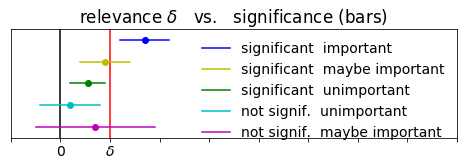

In [21]:
'''show relevance (delta) vs. significance (bars)'''

# Hinweise zur Qualität
Je weniger Voraussetzungen nötig sind, desto eher läßt sich ein Test anwenden.
- Rangsummentest statt t-Test
- Vorzeichentest statt Rangsummentest

Aber. Je einfacher der Test, desto weniger trennscharf sind die Ergebnisse.

## Fehler 2. Art:
Wie wahrscheinlich ist ein beibehalten der Nullhypothese, obwohl die Alternative zutrifft?

Diese Wahrscheinlichkeit nimmt mit abnehmender Trennschärfe des Tests zu!

1. Wenn Verteilung symmetrisch, dann Rangsummentest.
2. Sonst Vorzeichentest

# Ausblick

#### Varianz unbekannt
Bei unbekannter Streuung muß die Varianz zusätzlich (zum Gauß-Test) geschätzt werden.
[t-Test](T-Test.ipynb)
#### Verteilung
Von Interesse ist nicht nur ein Kennwert, sondern die *Verteilung*: 
[$\chi^2$-Test](Chisquare.ipynb)

## Alternativen
#### *nicht-parametrische* Tests
Gauß- und t-Test setzen eine Normalverteilung voraus.
- Oft in der Realität erfüllt

Bei unbekannter Verteilung bleiben *Charakteristika* wie **Median** und **Quantile**.
Dazu nicht-parametrische Tests wie z.B.
- Vorzeichen-Test
- Wilcoxon-Vorzeichen-Rangsummen-Test

Literatur: *Fahrmeier et.al.*

# Zusammenfassende Übersicht
## Test
- greift Grenze des Verwerfungsbereichs zum Signifikanzniveau $\alpha$ an
- kann eine Nullhypothese falsifizieren - **Das ist das Ziel!**
- bietet eine standardisierte, akzeptierte Entscheidungsregel
- geht Irrtumswahrscheinlichkeit $\alpha$ ein

## Test kann *nicht*
- die Nullhypothese verifizieren

## Problematik
- Irrtumswahrscheinlichkeit
- Missbrauch p-Wert
- Versuch *vorher* planen

## Fragen?